In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skopt as skopt

# Ideas

- Sería muy buena idea ver el tamaño del hueco mayor en la distribución según el sampleador.
- Hacer un estudio de la desviación estandard de la densidad de puntos según sampleador y número de puntos y número de bins.
- Tratamiento de datos de la distancia de un punto a cualquier otro.
- Tratamiento de datos de la distancia de un punto al más próximo.
- Tratamiento de datos de las alpha espheras
- Tratamiento de datos de las teselations de voronoy y/o Delaunay
- Ver el area solapada de las esferas con un determinado radio

La idea sería determinar cual puede ser el mejor sampleador para poner las pseudo-partículas en el plano 2D.

# Sampling a conformational region

In [2]:
n_sequence = 997 # 97, 997, 9973, 99929
box_sampled = np.array([[0.0, 1.0], [0.0, 1.0]])

In [3]:
def show_sequence(coordinates, title):
    
    plt.title(title)
    plt.scatter(coordinates[:,0], coordinates[:,1], marker=".", alpha=0.5)
    plt.axis('square')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    
    return plt.show()

## Pseudo-random uniform sampling

pseudo-random sequence (pseudo-random meaning “as close to randomness as we can get with a computer”)

a low discrepancy sequence gives, on average, better results for stochastic sampling problems than does a truly stochastic (really pseudo-random) sampling approach.

In [4]:
pseudo_random_generator = np.random.default_rng()

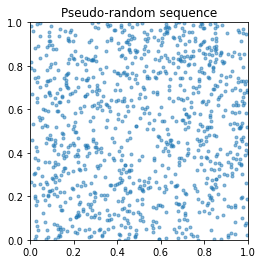

In [5]:
coordinates = np.zeros([n_sequence,2])
coordinates[:,0] = pseudo_random_generator.uniform(0.0, 1.0, n_sequence)
coordinates[:,1] = pseudo_random_generator.uniform(0.0, 1.0, n_sequence)

show_sequence(coordinates, 'Pseudo-random sequence')

## Halton's low discrepancy sequences

Quai-random number sequence

pseudo-stochastic sampling methods (also called “quasi-Monte Carlo” methods).

In [6]:
space = skopt.Space(box_sampled)
halton_generator = skopt.sampler.Halton()
coordinates = halton_generator.generate(space.dimensions, n_sequence)
coordinates = np.array(coordinates)

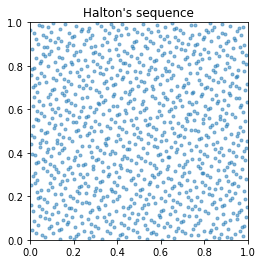

In [7]:
show_sequence(coordinates, "Halton's sequence")

## Sobol's low discrepancy sequences

In [8]:
space = skopt.Space(box_sampled)
sobol_generator = skopt.sampler.Sobol()
coordinates = sobol_generator.generate(space.dimensions, n_sequence)
coordinates = np.array(coordinates)

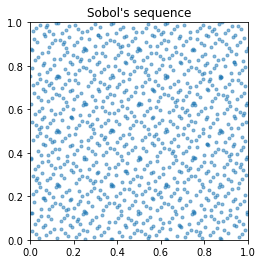

In [9]:
show_sequence(coordinates, "Sobol's sequence")

## Grid

In [28]:
space = skopt.Space(box_sampled)
grid_generator = skopt.sampler.Grid(use_full_layout=False)
coordinates = grid_generator.generate(space.dimensions, n_sequence)
coordinates = np.array(coordinates)

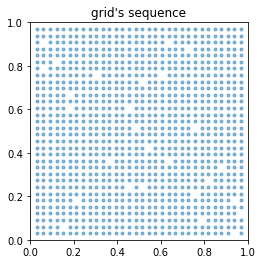

In [21]:
show_sequence(coordinates, "grid's sequence")

## Maximin optimized hypercube sampling

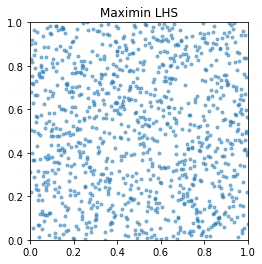

In [25]:
space = skopt.Space(box_sampled)
lhs_generator = skopt.sampler.Lhs(criterion="maximin", iterations=10000)
coordinates = lhs_generator.generate(space.dimensions, n_sequence)
coordinates = np.array(coordinates)

show_sequence(coordinates, "Maximin LHS")

## Ratio optimized hypercube sampling

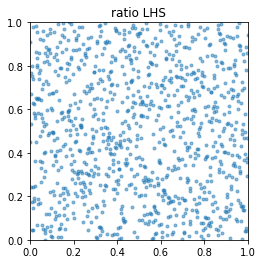

In [26]:
space = skopt.Space(box_sampled)
lhs_generator = skopt.sampler.Lhs(criterion="ratio", iterations=10000)
coordinates = lhs_generator.generate(space.dimensions, n_sequence)
coordinates = np.array(coordinates)

show_sequence(coordinates, "ratio LHS")

#### Sources

https://risk-engineering.org/notebook/monte-carlo-LHS.html    
https://scikit-optimize.github.io/dev/auto_examples/sampler/initial-sampling-method.html    
https://scikit-optimize.github.io/dev/auto_examples/sampler/initial-sampling-method-integer.html     
https://chaospy.readthedocs.io/en/master/sampling/sequences.html